In [1]:
using CairoMakie
using CSV,DataFrames
# include("./../scythetools.jl")

In [2]:
function loadScytheFile(path)
    return CSV.read(path,DataFrame) 
end

function flatten!(arr,dimensions::Union{Int,AbstractVector})
    return dropdims(arr,dims=dimensions)
end

flatten! (generic function with 1 method)

In [5]:
# load in files from dx gaussian rz simulations and plot
timet = 432000
basedir = "/bell-scratch/tbarbero/Scythe_test/Kepert2017_tcbl_new/"
fname = "physical_out_$timet.0.csv"

tag = "Gaussian_XMAX600.0km_NX50_DX4.0km"
filepath = joinpath(basedir,tag,fname)
df4 = loadScytheFile(filepath)
r4 = unique(df4.r)
nr4 = length(r4)

tag = "Gaussian_XMAX600.0km_NX400_DX0.5km"
filepath = joinpath(basedir,tag,fname)
df05 = loadScytheFile(filepath);
r05 = unique(df05.r)
nr05 = length(r05)

z = unique(df05.z)
nz = length(z);

In [6]:
# get list of wbs throughout time
times = 0:432000:864000
nt = length(times)
wb_arr4 = Array{Float32}(undef,nt,nz,nr4)
wb_arr05 = Array{Float32}(undef,nt,nz,nr05)
ub_arr4 = Array{Float32}(undef,nt,nz,nr4)
ub_arr05 = Array{Float32}(undef,nt,nz,nr05)
vb_arr4 = Array{Float32}(undef,nt,nz,nr4)
vb_arr05 = Array{Float32}(undef,nt,nz,nr05)

LEV = 8
for (i,timet) in enumerate(times)
    tag = "Gaussian_XMAX600.0km_NX50_DX4.0km"
    fname = "physical_out_$timet.0.csv"
    filepath = joinpath(basedir,tag,fname)
    df = loadScytheFile(filepath)
    wb_arr4[i,:,:] = reshape(df.wb,nz,nr4)
    ub_arr4[i,:,:] = reshape(df.ub,nz,nr4)
    vb_arr4[i,:,:] = reshape(df.vb,nz,nr4)


    tag = "Gaussian_XMAX600.0km_NX400_DX0.5km"
    fname = "physical_out_$timet.0.csv"
    filepath = joinpath(basedir,tag,fname)
    df = loadScytheFile(filepath)
    wb_arr05[i,:,:] = reshape(df.wb,nz,nr05)
    ub_arr05[i,:,:] = reshape(df.ub,nz,nr05)
    vb_arr05[i,:,:] = reshape(df.vb,nz,nr05)

end

In [7]:
cmap=Reverse(:RdBu)
wblevs=-0.55:0.1:0.55
ublevs=-2:0.25:0
vblevs=0:2:15
LEV = 11
t1 = findall(x->x==432000,times)
t2 = findall(x->x==432000*2,times)

1-element Vector{Int64}:
 3

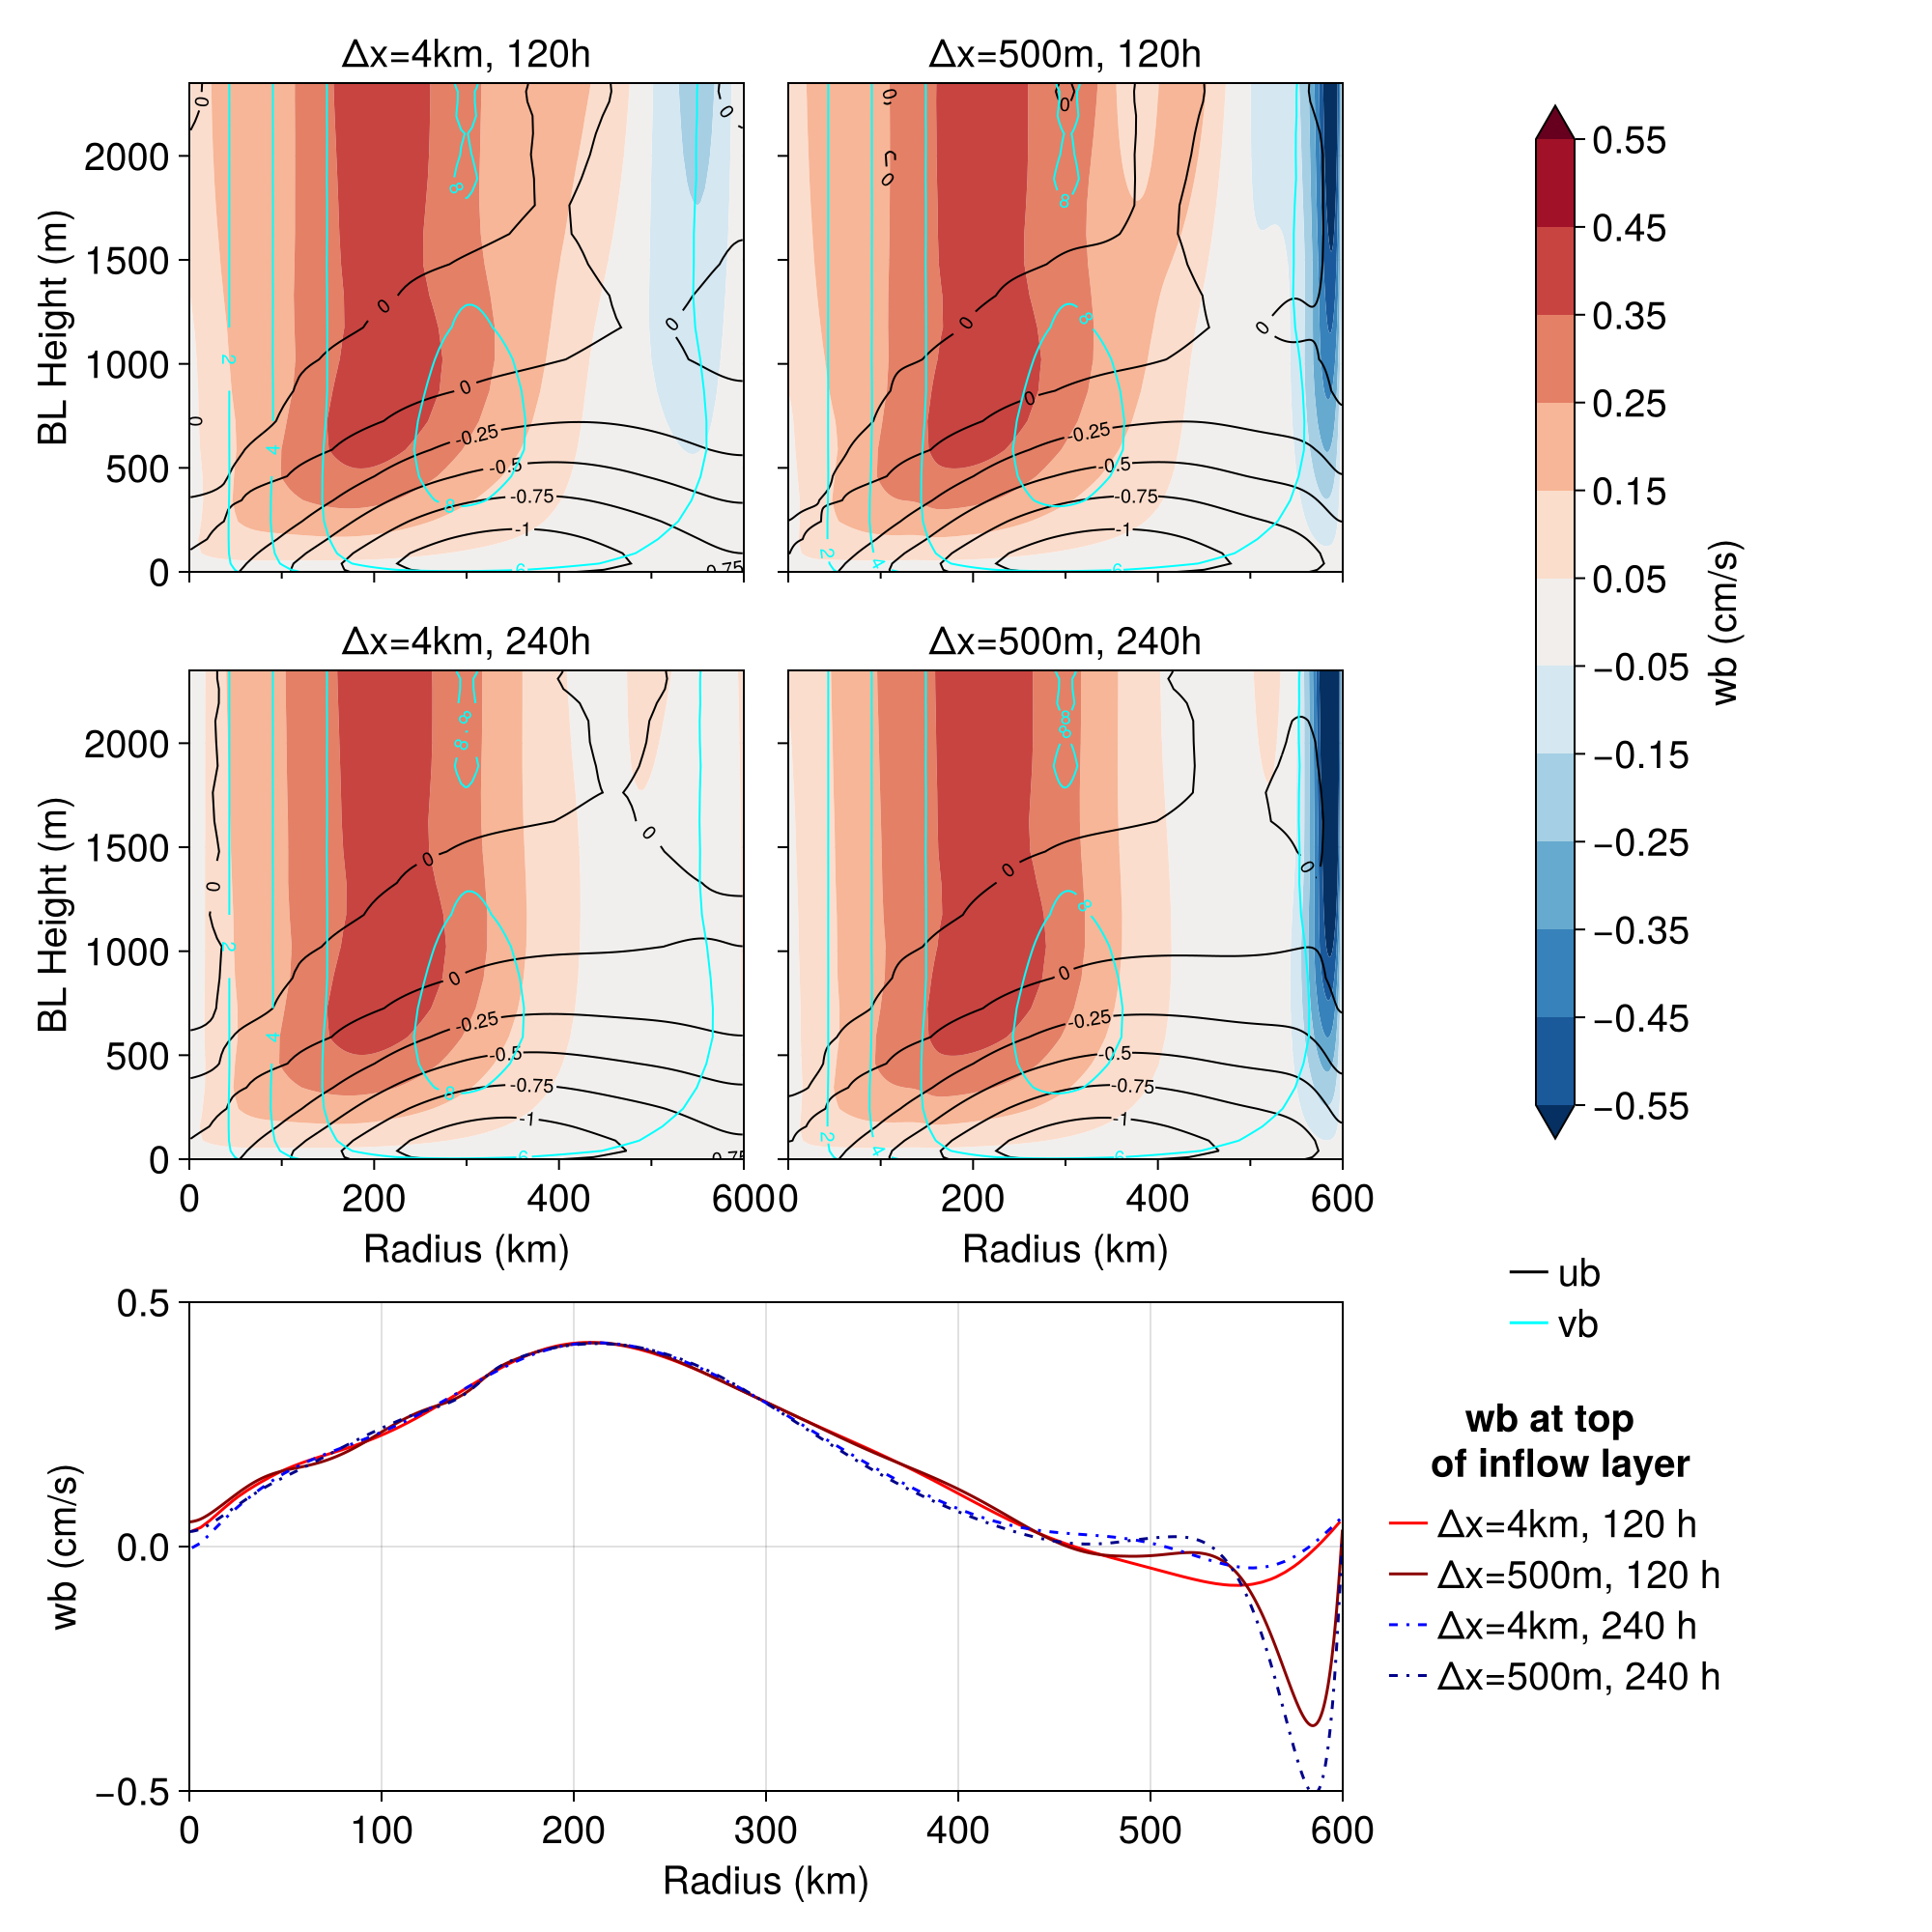

In [8]:
f = Figure(size=(1000,1000),fontsize=20)
ax1 = Axis(f[1,1])
ax2 = Axis(f[1,2])
ax3 = Axis(f[2,1])
ax4 = Axis(f[2,2])
ax5 = Axis(f[3,1:2])

# create custom Legend for contour lines, bug in CairoMakie
colors = [:white,:white,:white,:black, :cyan]
labels = ["","","","ub", "vb"]
# Create dummy handles using empty data
handles = [lines!(ax4,0:1:1,color=c) for c in colors]
# Create and place the custom legend
Legend(f[2:3,3],handles, labels,framevisible=false)

# plot wb
contourf!(ax1,r4/1000.,z,100*flatten!(wb_arr4[t1,:,:],1)',colormap=cmap,levels=wblevs,extendlow=:auto,extendhigh=:auto)
contourf!(ax2,r05/1000.,z,100*flatten!(wb_arr05[t1,:,:],1)',colormap=cmap,levels=wblevs,extendlow=:auto,extendhigh=:auto)
contourf!(ax3,r4/1000.,z,100*flatten!(wb_arr4[t2,:,:],1)',colormap=cmap,levels=wblevs,extendlow=:auto,extendhigh=:auto)
dat = contourf!(ax4,r05/1000.,z,100*flatten!(wb_arr05[t2,:,:],1)',colormap=cmap,levels=wblevs,extendlow=:auto,extendhigh=:auto)
Colorbar(f[1:2,3],dat,ticks=wblevs,width=20,height=540,label="wb (cm/s)")

# plot ub
contour!(ax1,r4/1000.,z,flatten!(ub_arr4[t1,:,:],1)',color=:black,levels=ublevs,labels=true)
contour!(ax2,r05/1000.,z,flatten!(ub_arr05[t1,:,:],1)',color=:black,levels=ublevs,labels=true)
contour!(ax3,r4/1000.,z,flatten!(ub_arr4[t2,:,:],1)',color=:black,levels=ublevs,labels=true)
contour!(ax4,r05/1000.,z,flatten!(ub_arr05[t2,:,:],1)',color=:black,levels=ublevs,labels=true)

# plot vb
contour!(ax1,r4/1000.,z,flatten!(vb_arr4[t1,:,:],1)',color=:cyan,levels=vblevs,labels=true)
contour!(ax2,r05/1000.,z,flatten!(vb_arr05[t1,:,:],1)',color=:cyan,levels=vblevs,labels=true)
contour!(ax3,r4/1000.,z,flatten!(vb_arr4[t2,:,:],1)',color=:cyan,levels=vblevs,labels=true)
contour!(ax4,r05/1000.,z,flatten!(vb_arr05[t2,:,:],1)',color=:cyan,levels=vblevs,labels=true)


# plot wb at top of inflow layer
lines!(ax5,r4/1000.,100*flatten!(wb_arr4[t1,LEV,:],1),color=:red,label="Δx=4km, 120 h")
lines!(ax5,r05/1000.,100*flatten!(wb_arr05[t1,LEV,:],1),color=:darkred,label="Δx=500m, 120 h")
lines!(ax5,r4/1000.,100*flatten!(wb_arr4[t2,LEV,:],1),color=:blue,linestyle=:dashdot,label="Δx=4km, 240 h")
lines!(ax5,r05/1000.,100*flatten!(wb_arr05[t2,LEV,:],1),color=:darkblue,linestyle=:dashdot,label="Δx=500m, 240 h")
Legend(f[3,3],ax5,"wb at top \n of inflow layer",framevisible=false)

# labeling
titles = ["Δx=4km, 120h","Δx=500m, 120h","Δx=4km, 240h","Δx=500m, 240h"]
for (i,ax) in enumerate([ax1,ax2,ax3,ax4])
    xlims!(ax,0,600)
    ylims!(ax,0,2350)
    ax.xticks = 0:200:600
    ax.xminorticksvisible = true
    ax.title = titles[i]
    ax.titlefont = :regular
    if ax==ax1 || ax==ax2
        ax.xticklabelsvisible=false
    end
    if ax==ax2 || ax==ax4
        ax.yticklabelsvisible=false
    end
    if ax==ax3 || ax==ax4
        ax.xlabel = "Radius (km)"
    end
    if ax==ax1 || ax==ax3
        ax.ylabel = "BL Height (m)"
    end
#     hlines!(ax,z[LEV],color=:black,linestyle=:dash)
end
for (i,ax) in enumerate([ax5])
    ax.ylabel = "wb (cm/s)"
    ax.xlabel = "Radius (km)"
    ylims!(ax,-0.5,0.5)
    xlims!(ax,0,600)
end
f